In [27]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [28]:
from IPython.display import Image

<h1 id="tcheading">Table Of Contents</h1>
<div id ="toc"></div>

## Bayes Theorem Statement - Various Formulation
$$P(A|B) = {{P(B|A)P(A)}\over{P(B)}} $$

$$P(A|B) = {{P(B \cup A)}\over{P(B)}} $$

$$P(A|B) = {{P(B|A)P(A)}\over{P(B|A)P(A)+P(B|\sim A)P(\sim A)}} $$

* $P(A|B)$ Conditional probability that A is true, given B is true
* $P(B|A)$ Conditional probability that B is true, given A is true
* $P(B)$ Probabiltiy of B being true, with no regard to A
* $P(A)$ Probability of A being true, with no regard to B
* $P(A \cup B) $ Probability of A and B
* $P(B|~A)$ Probability of B, given not A
* $P(\sim A)$ Probability of not A

Maybe we can move things around?

## Bayes Theorem Discussion
Describes the probability of an event, based on conditions which may be related to an event. One concept of Bayes theorem is that of the Decision tree - where each level of the decision tree is defined in terms of the branching probability from the node.

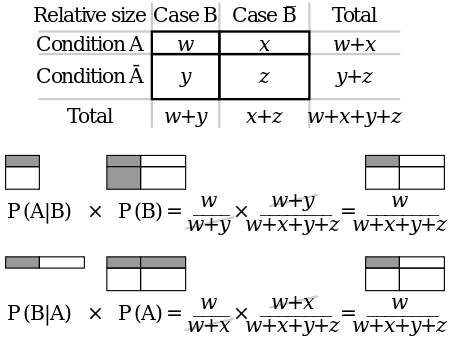

In [29]:
Image(filename="/home/mjbeaumier/Programming/interview_prep/stats/img/bayes_theorem_bayesian_interp.png")

## Example Problems
You are given a bag of 100 coins, with 99 fair coins flipping heads and tails with 0.5 probability each, and one unfair coin which flips heads with 1.0 probability. You can pick a coin and flip it 10 times, getting heads every single time What is the probability that you picked the unfair coin?

### Identify the probabilities
Thought process: identify the events, which we want to determine the probability of.
* $P(A)$ - probability of picking the unfair coin
* $P(B)$ - probability of flipping heads ten times in a row
* $P(B|A)$ - probability of flipping heads, given we picked the unfair coin
* $P(B|\sim A)$ - probability of flipping heads given we picked a fair coin
* $P(\sim A)$ - probability of not choosing the unfair coin

### Python Implementation

#### Note on bernoulli process:

In probability and statistics, a Bernoulli process is a finite or infinite sequence of binary random variables, so it is a discrete-time stochastic process that takes only two values, canonically 0 and 1. The component Bernoulli variables Xi are identical and independent.

In [30]:
import random

def bernoulli_process(p):
    if p > 1.0 or p < 0.0:
        raise ValueError("p should be between 0.0 and 1.0.")

    while True:
        yield random.random() < p

def pick_random_coin(fair_coin_probablity):
    if random.random() < fair_coin_probablity:
        return bernoulli_process(0.5)
    else:
        return bernoulli_process(1.0)

a = 0  # number of times we get 10 heads in a row AND coin was unfair
b = 0  # total number of times we get 10 heads in a row
for __ in xrange(100000):
    coin = pick_random_coin(0.99)
    if True not in [coin.next() for __ in xrange(10)]:
        b += 1
        # check to see if the coin is unfair, or we
        # just got really lucky
        if coin.gi_frame.f_locals['p'] > 0.6:
            a += 1

print float(a) / b

0.0


# Flipping Coins

## Flipping Three Fair Coins, Probability of Getting At Least Two Heads

In [31]:
def flip_three_coins():
    """ 
    Returns a list of outcomes from flipping a fair coin. List is a tuple
    containing possible outcomes of three coinflips, i.e: (0,1,0) is "heads
    "tails","heads"
    """
    coin_flips = []
    for i in range(2):
        for j in range(2):
            for k in range(2):
                coin_flips.append((i,j,k))
    return coin_flips

In [32]:
# Probability of two or more heads

flip_three_coins()
print len(flip_three_coins())

two_heads = 0
for outcomes in flip_three_coins():
    sum_outcomes = 0
    for result in outcomes:
        sum_outcomes += result
    if sum_outcomes > 1:
        two_heads += 1
print two_heads,len(flip_three_coins())


# probability of H, T, H:

8
4 8


## Rolling a fair 6-sided die and 4-sided die

In [33]:
def get_possible_die_outcomes():
    """
    returns a list of tuples of two die outcomes (six sided_outcome, four_sided_outcome)
    rolled simultaneously
    """
    die_rolls = []
    for i in range(1,7):
        for j in range (1,5):
            die_rolls.append((i,j))
    return die_rolls

In [34]:
sum_of_six_or_more = 0
for dice in get_possible_die_outcomes():
    if dice[0] + dice[1] >= 6:
        sum_of_six_or_more += 1
print sum_of_six_or_more,len(get_possible_die_outcomes())

14 24


In [35]:
14/2

7

In [36]:
24/2

12

## Flipping a coin OR rolling an odd number on a fair 6-sided die

In [37]:
counter = 0
total_events = 0
for i in range(2):
    for j in range(1,7):
        total_events += 1
        if not j % 2 != 0 or i == 0:
            counter += 1
print counter,total_events


9 12


## Markov Chains

### Bobo The Amoeba

Bobo has the following odds of reproduction
* P(0 offspring) = 0.25
* P(1 offspring) = 0.25
* P(2 offspring) = 0.5

What are the odds that Bobo's lineage dies out, given that each amoeba has the same odds to reproduce has Bobo?

### Simulation
Bobo's lineage either explodes, or, it dies out immediately.

In [20]:
import random
import os
import sys

n_amoeba = 1

def reproduce(n):
    '''
    Given a population of n ameobas, returns the number of offspring, with each amoeba having
    the following chances to produce offspring:
    0: 0.25
    1: 0.25
    2: 0.5
    '''
    new_population = 0
    for i in range(0,n):
        rand_int = random.randint(1,4)
        if rand_int == 2:
            new_population += 1
        if rand_int > 2:
            new_population += 2
    return new_population

def simulate_bobo(population):
    '''
    Given an initial population of amoebas (all named bobo), count the number of generations 
    it takes for bobo's lineage to die off. Bobo is considered effectively immortal if his 
    lineage makes it to 30 generations. Returns whether or not bobo's lineage is immortal
    '''
    n_amoeba = population
    number_of_generations = 0
    is_immortal == False
    while n_amoeba > 0:
        n_amoeba = reproduce(n_amoeba)
        number_of_generations+=1
        if number_of_generations == 30:
            print "Bobo lives forever."
            print number_of_generations,n_amoeba
            is_immortal = True
    return is_immortal




## Determine Bias Of Coin, Given Series of Flips
We are given an array of coin-flips, i.e. ['H','T','H','H','H'....] and need an algorithm which determines if the data set came from a fair, or unfair coin, and if so, calculating the bias of that coin.

In [7]:
import random
def generate_coin_flips(n_flips,h_bias):
    flip_set = []
    for flip in range(n_flips):
        if random.random() < h_bias:
            flip_set.append('H')
        else:
            flip_set.append('T')
    return flip_set
    

In [24]:
flips = generate_coin_flips(1000,0.9)

In [31]:
def get_coin_bias(flips):
    heads = 0.
    tails = 0.
    for flip in flips:
        if flip == 'H':
            heads+=1.
        else:
            tails+=1.
    print 'Raw dataset:'
    print 'N:',len(flips)
    print 'heads:',heads,heads/(heads+tails),'%'
    print 'tails:',tails,tails/(heads+tails),'%'
    print 'Probability coin is fair:'
    print 'Probability coin is not fair:'
    print 'Uncertait'
    
    # Next steps - generate the uncertainty of this calculation
    # using the p-value (Z-score?)

In [32]:
get_coin_bias(flips)

Raw dataset:
N: 1000
heads: 905.0 0.905 %
tails: 95.0 0.095 %
